#*Chapter 4.1.1 LSTM MULTIVARIATE TIME SERIES Baseline Model*

#**Chapter 4.1.1**





In [ ]:
#google colab access
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import librries 
import pandas as pd
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import glob #for maps
import plotly.graph_objects as go
import plotly.offline
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import itertools
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
warnings.filterwarnings("ignore")
import plotly.express as px
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

#model NN
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout, LSTM
import keras.models
import tensorflow
from keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

##**Data Reading and Additional Processing**

In [ ]:
fin_data = pd.read_csv('/content/gdrive/MyDrive/Sent/final_data_May20_Sept22.csv')

In [ ]:
fin_data.head(5)

,latitude,longitute,Year,Month,Day,Hour,nitrogendioxide_tropospheric_column,nitrogendioxide_tropospheric_column_precision,nitrogendioxide_tropospheric_column_precision_kernel,air_mass_factor_troposphere,air_mass_factor_total,tm5_tropopause_layer_index,qa_value,utc,date,pm10,pm25
0,52.157350,13.716069,2020.0,5.0,1.0,11.0,1.459978e-05,0.000018,0.000017,0.952377,1.804340,14.0,0.0074,2020-05-01,2020-05-01 11:00:00,6.2615,11.934496
1,52.192528,13.806399,2020.0,5.0,1.0,11.0,-6.227974e-06,0.000014,0.000014,0.951523,1.798625,14.0,0.0074,2020-05-01,2020-05-01 11:00:00,6.2615,11.934496
2,52.227226,13.895948,2020.0,5.0,1.0,11.0,5.757178e-07,0.000013,0.000013,0.918600,1.780306,14.0,0.0074,2020-05-01,2020-05-01 11:00:00,6.2615,11.934496
3,52.167213,13.589217,2020.0,5.0,1.0,11.0,1.580315e-05,0.000011,0.000011,1.077755,1.861350,14.0,0.0074,2020-05-01,2020-05-01 11:00:00,6.2615,11.934496
4,52.202910,13.680410,2020.0,5.0,1.0,11.0,1.687531e-05,0.000016,0.000015,1.005521,1.828623,14.0,0.0074,2020-05-01,2020-05-01 11:00:00,6.2615,11.934496


(220179, 15)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


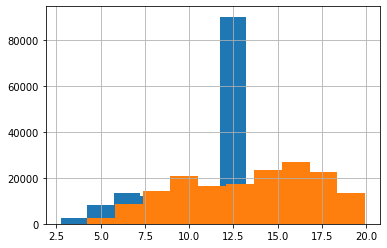

In [ ]:
#print histograms of Pm10 and PM25
print(final_data.shape)
print(fin_data['pm25'].hist())
print(fin_data['pm10'].hist())

In [ ]:
fin_data.shape

(166395, 17)

In [ ]:
fin_data['qa_value'].unique() #quality value 

array([0.0074, 0.01  , 0.0011, 0.0067, 0.009 , 0.0033, 0.0015, 0.0045,
       0.003 , 0.0014, 0.0005, 0.001 , 0.0073])

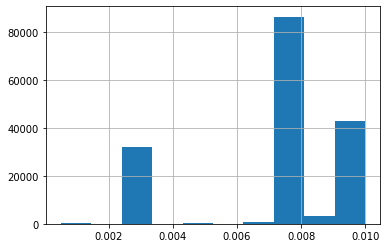

In [ ]:
fin_data['qa_value'].hist()

In [ ]:
fin_data = fin_data.loc[(fin_data['qa_value'] > 0.004)]

In [ ]:
fin_data.shape

(133820, 17)

In [ ]:
fin_data.sort_values(by='date', inplace=True)
fin_data.head()

,latitude,longitute,Year,Month,Day,Hour,nitrogendioxide_tropospheric_column,nitrogendioxide_tropospheric_column_precision,nitrogendioxide_tropospheric_column_precision_kernel,air_mass_factor_troposphere,air_mass_factor_total,tm5_tropopause_layer_index,qa_value,utc,date,pm10,pm25
0,52.157350,13.716069,2020.0,5.0,1.0,11.0,1.459978e-05,0.000018,0.000017,0.952377,1.804340,14.0,0.0074,2020-05-01,2020-05-01 11:00:00,6.2615,11.934496
95,52.548504,13.041852,2020.0,5.0,1.0,11.0,1.250596e-05,0.000011,0.000011,1.022428,1.844749,14.0,0.0074,2020-05-01,2020-05-01 11:00:00,6.2615,11.934496
96,52.585503,13.135360,2020.0,5.0,1.0,11.0,-4.180619e-07,0.000011,0.000011,0.921338,1.783975,14.0,0.0074,2020-05-01,2020-05-01 11:00:00,6.2615,11.934496
97,52.621986,13.228033,2020.0,5.0,1.0,11.0,8.273078e-06,0.000012,0.000012,0.999683,1.816041,14.0,0.0074,2020-05-01,2020-05-01 11:00:00,6.2615,11.934496
98,52.657963,13.319888,2020.0,5.0,1.0,11.0,1.682993e-05,0.000014,0.000013,0.921474,1.775496,14.0,0.0074,2020-05-01,2020-05-01 11:00:00,6.2615,11.934496


In [ ]:
data_LSTM_test1=fin_data.drop(columns=['date', 'utc', 'pm25','tm5_tropopause_layer_index', 'latitude', 'longitute', 'Year', 'Month', 'Day', 'Hour', 'qa_value']) #drop columns that are not used for LSTM

In [ ]:
data_LSTM_test1.head(5)

,nitrogendioxide_tropospheric_column,nitrogendioxide_tropospheric_column_precision,nitrogendioxide_tropospheric_column_precision_kernel,air_mass_factor_troposphere,air_mass_factor_total,pm10
0,1.459978e-05,0.000018,0.000017,0.952377,1.804340,6.2615
95,1.250596e-05,0.000011,0.000011,1.022428,1.844749,6.2615
96,-4.180619e-07,0.000011,0.000011,0.921338,1.783975,6.2615
97,8.273078e-06,0.000012,0.000012,0.999683,1.816041,6.2615
98,1.682993e-05,0.000014,0.000013,0.921474,1.775496,6.2615


##**Feature Engineering for LSTM**

**Reference**

The model scrip was adopted from the following webpage: 

https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/



In [ ]:

# convert series to supervised learning

#https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
		
	return agg
#https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

# load dataset
values = data_LSTM_test1.values
# integer encode direction
encoder = LabelEncoder()
#values[:,8] = encoder.fit_transform(values[:,8])
values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed.drop(reframed.columns[[0,6, 8,9,10,11]], axis=1, inplace=True)
print(reframed.head())

   var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var2(t)
1   0.018191   0.018763   0.243149   0.357339   0.129479  0.008212
2   0.008212   0.008622   0.266456   0.371345   0.129479  0.008405
3   0.008405   0.009252   0.232822   0.350280   0.129479  0.009880
4   0.009880   0.010570   0.258888   0.361394   0.129479  0.012215
5   0.012215   0.012459   0.232868   0.347342   0.129479  0.009161


In [ ]:
#Train/Val/Test
values = reframed.values
x, x_test, y, y_test = train_test_split(values[:, :-1],values[:,-1],test_size=0.1,train_size=0.9, random_state=None, shuffle=False)
x_train, x_val, train_y, val_y = train_test_split(x,y,test_size = 0.2,train_size =0.8, random_state=None, shuffle=False)

In [ ]:
# reshape input to be 3D [samples, timesteps, features]
train_X = x_train.reshape((x_train.shape[0], 1, x_train.shape[1])) 
val_X = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
test_X = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

In [ ]:
print(train_X.shape, train_y.shape, val_X.shape, val_y.shape, test_X.shape, y_test.shape)

(96349, 1, 5) (96349,) (24088, 1, 5) (24088,) (13382, 1, 5) (13382,)


##**LSTM Baseline**

Epoch 1/15
1506/1506 - 39s - loss: 0.0102 - val_loss: 0.0103 - 39s/epoch - 26ms/step
Epoch 2/15
1506/1506 - 29s - loss: 0.0092 - val_loss: 0.0106 - 29s/epoch - 19ms/step
Epoch 3/15
1506/1506 - 29s - loss: 0.0090 - val_loss: 0.0110 - 29s/epoch - 19ms/step
Epoch 4/15
1506/1506 - 29s - loss: 0.0089 - val_loss: 0.0110 - 29s/epoch - 19ms/step
Epoch 5/15
1506/1506 - 29s - loss: 0.0088 - val_loss: 0.0109 - 29s/epoch - 19ms/step
Epoch 6/15
1506/1506 - 28s - loss: 0.0087 - val_loss: 0.0110 - 28s/epoch - 18ms/step
Epoch 7/15
1506/1506 - 28s - loss: 0.0087 - val_loss: 0.0108 - 28s/epoch - 18ms/step
Epoch 8/15
1506/1506 - 28s - loss: 0.0087 - val_loss: 0.0111 - 28s/epoch - 19ms/step
Epoch 9/15
1506/1506 - 28s - loss: 0.0087 - val_loss: 0.0108 - 28s/epoch - 18ms/step
Epoch 10/15
1506/1506 - 28s - loss: 0.0086 - val_loss: 0.0109 - 28s/epoch - 18ms/step
Epoch 11/15
1506/1506 - 31s - loss: 0.0086 - val_loss: 0.0110 - 31s/epoch - 21ms/step
Epoch 12/15
1506/1506 - 28s - loss: 0.0086 - val_loss: 0.0108 -

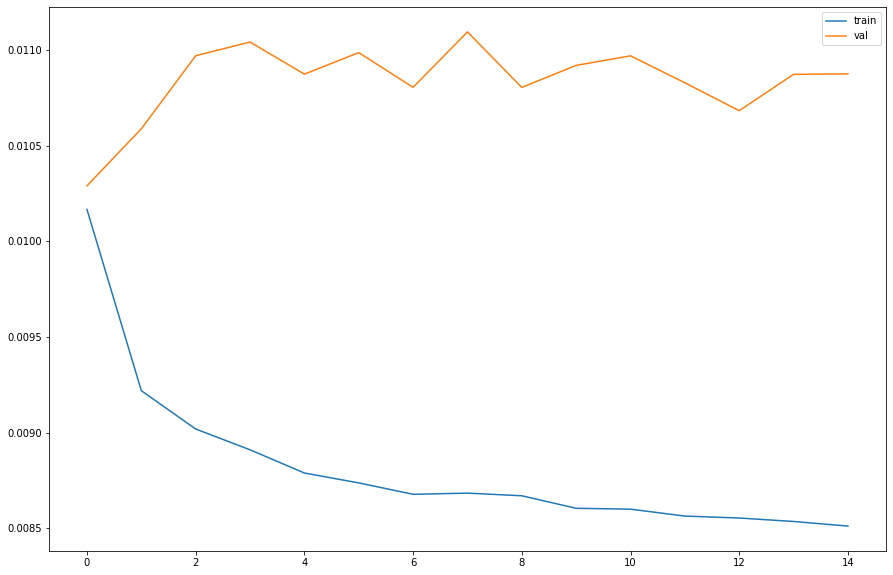

CPU times: user 11min 55s, sys: 27.3 s, total: 12min 22s
Wall time: 7min 18s


In [ ]:
#https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

%%time
model = Sequential()
model.add(LSTM(500, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam') #mean absolute error  
history = model.fit(train_X, train_y, epochs=15, batch_size=64, validation_data=(val_X, val_y), verbose=2, shuffle=False)

#plot history
plt.figure(figsize=(15, 10))

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show() 

##**Result Visualisation**

753/753 [==============================] - 4s 5ms/step


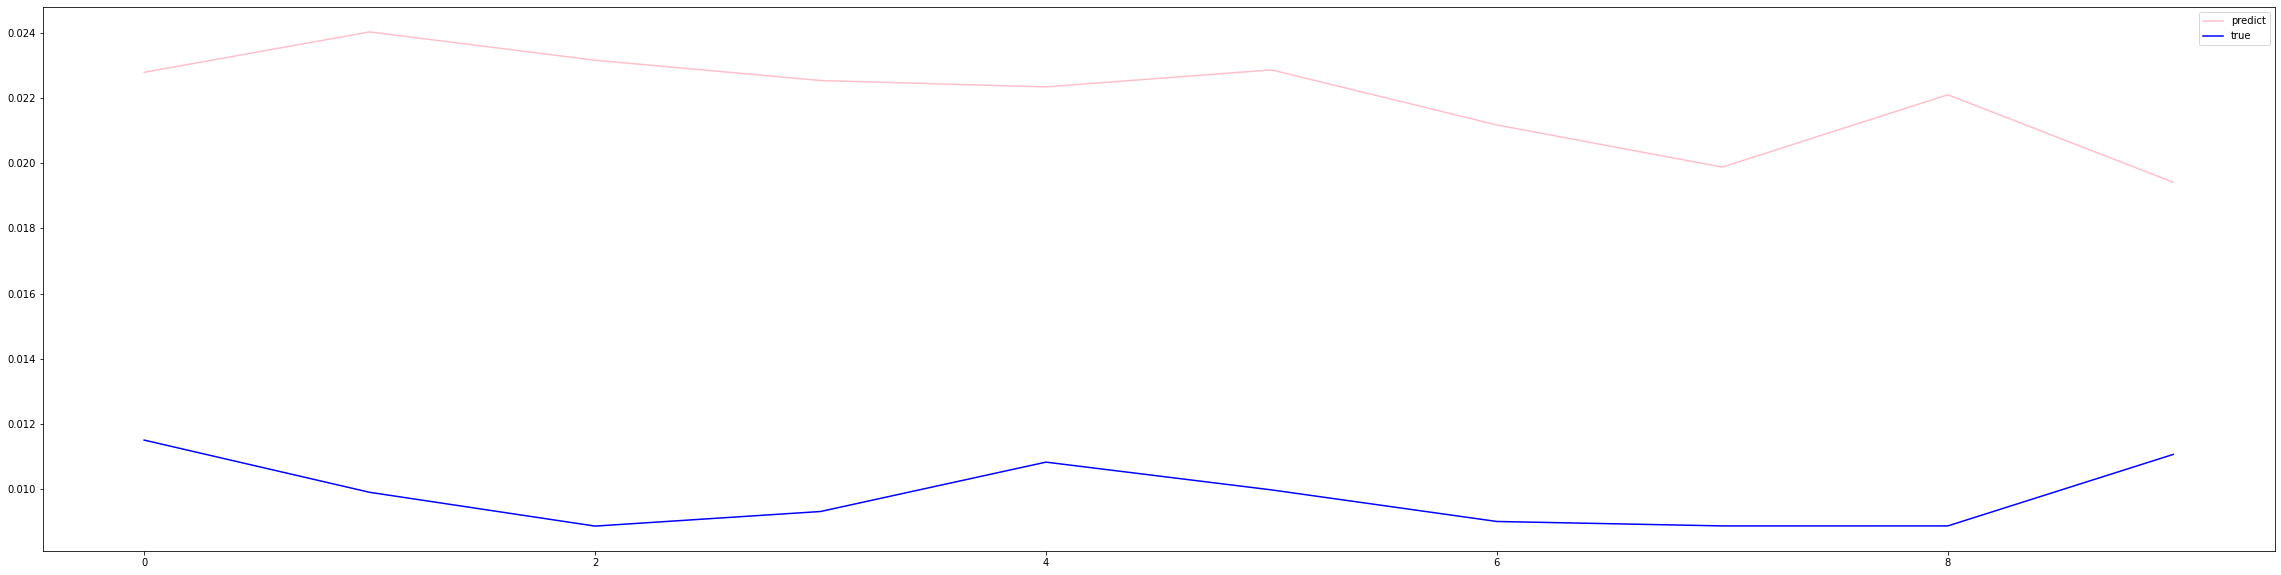

In [ ]:
#Validation set (8 days forecast)

yhat = model.predict(val_X)
plt.figure(figsize=(40, 10))
pyplot.plot(yhat[-10:], label='predict', color = 'pink')
pyplot.plot(val_y[-10:], label='true', color = 'blue')
pyplot.legend()

pyplot.show()

3011/3011 [==============================] - 15s 5ms/step


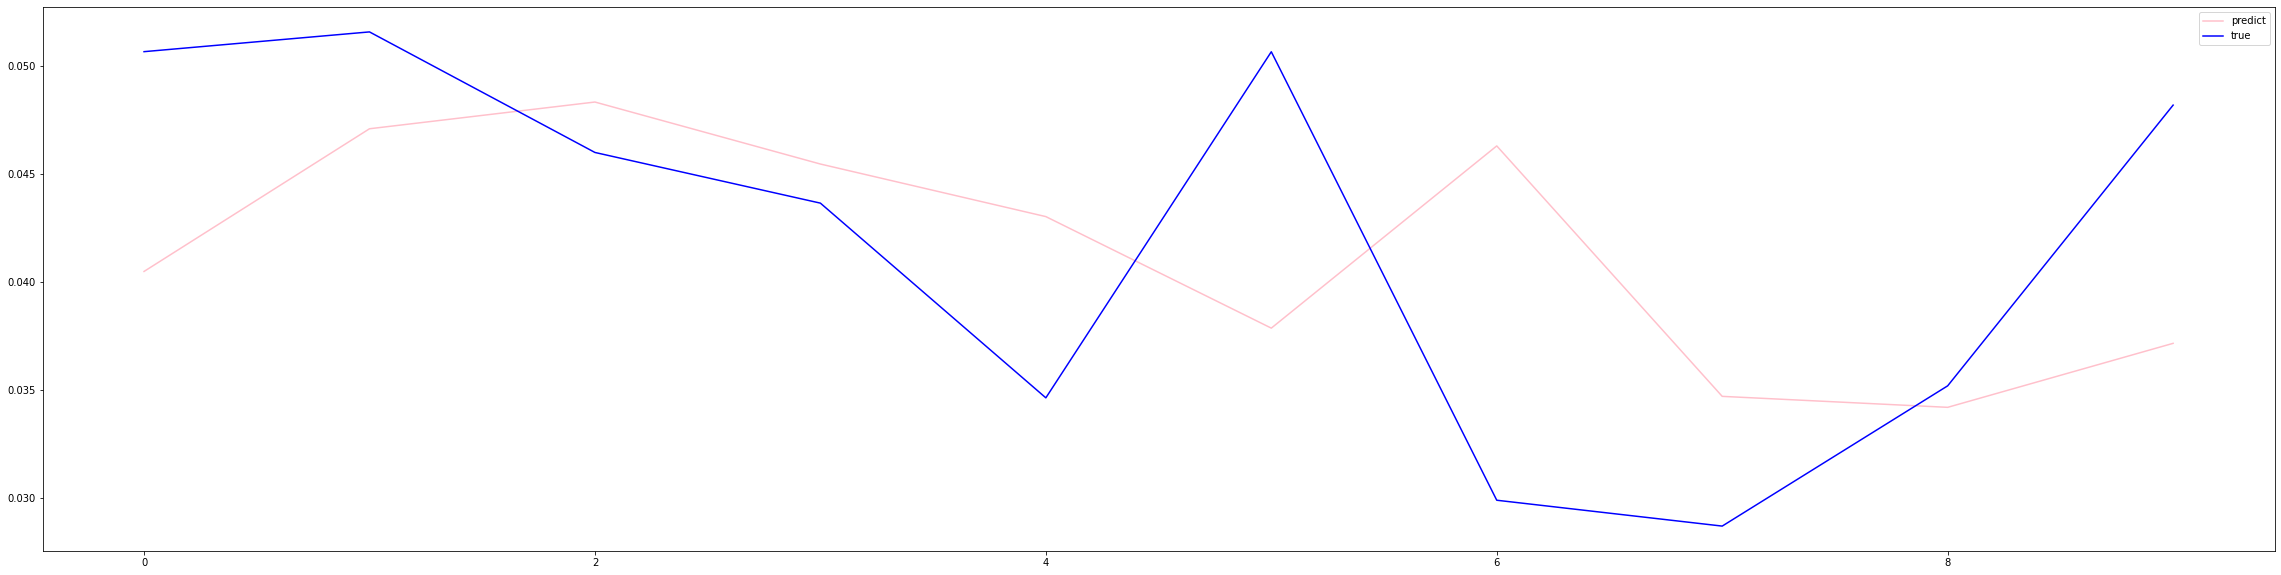

In [ ]:
#Train set (8 days forecast)

yhat = model.predict(train_X)
plt.figure(figsize=(40, 10))
pyplot.plot(yhat[-10:], label='predict', color = 'pink')
pyplot.plot(train_y[-10:], label='true', color = 'blue')
pyplot.legend()

pyplot.show()

419/419 [==============================] - 2s 6ms/step


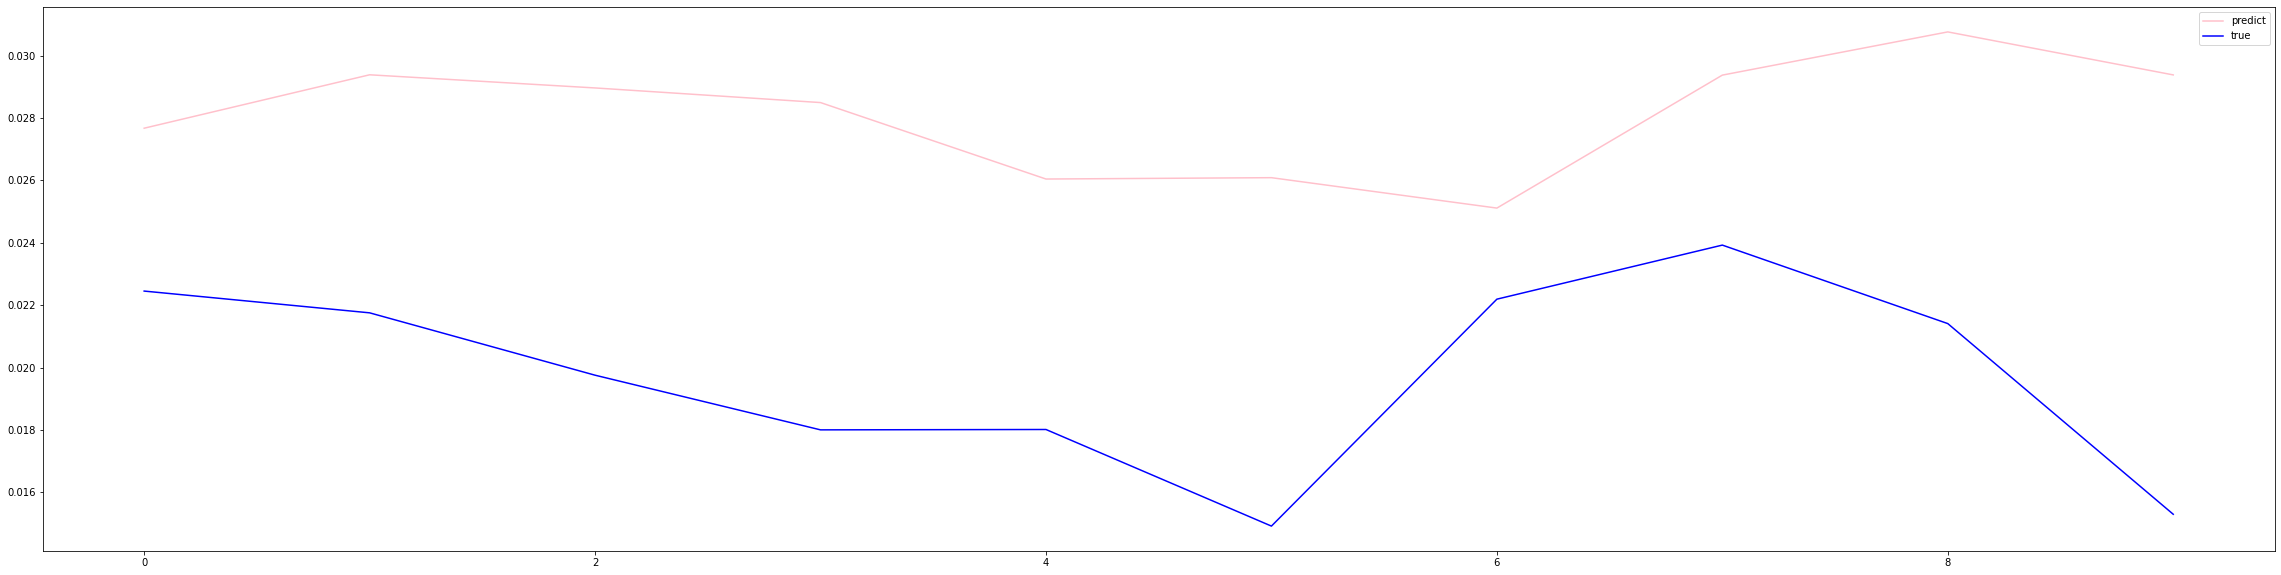

In [ ]:
#Test set (8 days forecast)

yhat = model.predict(test_X)
plt.figure(figsize=(40, 10))
pyplot.plot(yhat[-10:], label='predict', color = 'pink')
pyplot.plot(y_test[-10:], label='true', color = 'blue')
pyplot.legend()

pyplot.show()